In [56]:
# Import necessary libraries
import pandas as pd  # For data loading and manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

data = pd.read_csv(r'D:\ML2\SriLanka_Weather_Dataset6.csv')

# Display the first few rows of the dataset
data.head()


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,1/1/2010,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0,11.7,27.4,20,4.58,7.0,79.899994,16,Sri Lanka,Colombo
1,1/2/2010,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1,13.0,27.0,24,3.84,7.0,79.899994,16,Sri Lanka,Colombo
2,1/3/2010,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3,12.3,27.4,16,3.65,7.0,79.899994,16,Sri Lanka,Colombo
3,1/4/2010,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0,17.0,34.6,356,3.79,7.0,79.899994,16,Sri Lanka,Colombo
4,1/5/2010,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0,18.7,37.1,355,4.97,7.0,79.899994,16,Sri Lanka,Colombo


In [ ]:
# Check for missing values in each column
print(data.isnull().sum())

In [ ]:
print(data.describe())

# Fill missing values in numeric columns with the mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Feature Engineering: Calculate 'sunshine_hours' from 'sunrise' and 'sunset'
data['sunshine_hours'] = (pd.to_datetime(data['sunset']) - pd.to_datetime(data['sunrise'])).dt.total_seconds() / 3600

# Define features (X) and target (y)
features = [
    'temperature_2m_mean',
    'apparent_temperature_mean',
    'precipitation_sum',
    'windspeed_10m_max',
    'et0_fao_evapotranspiration',
    'shortwave_radiation_sum'
]

X = data[features]
y = data['sunshine_hours'].dropna()  # Drop rows with missing target values
X = X.loc[y.index]  # Align X with the filtered y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")

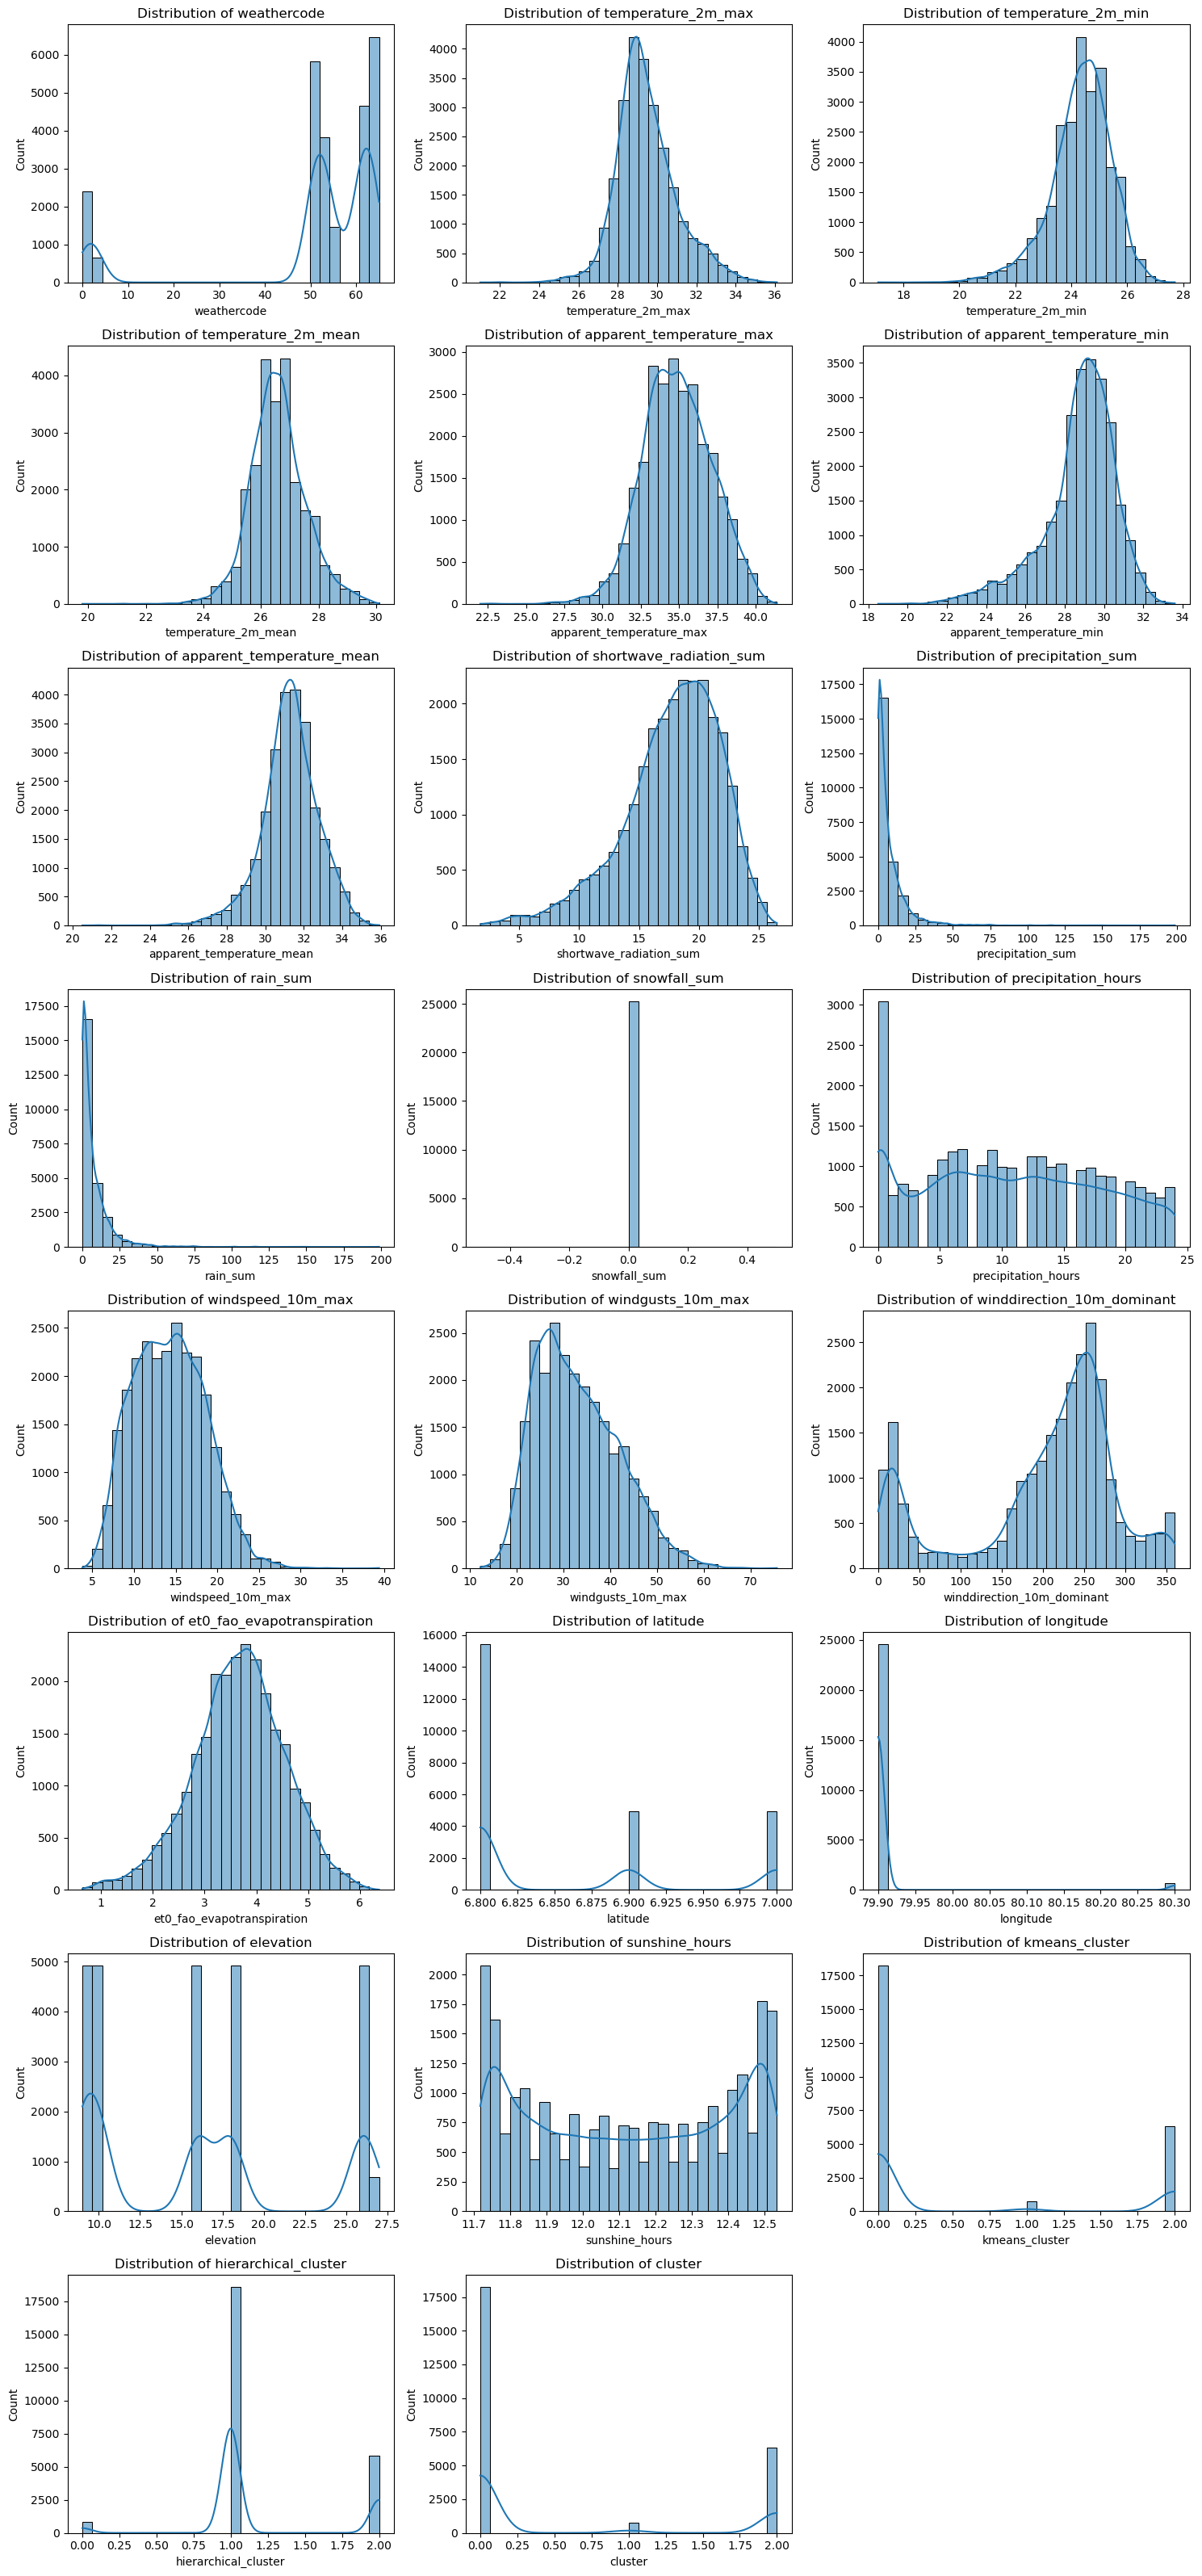

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the grid size to match the number of columns
num_columns = len(data.select_dtypes(include=['float64', 'int64']).columns)
grid_rows = (num_columns // 3) + 1  # Calculate rows based on number of columns

plt.figure(figsize=(15, grid_rows * 4))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(grid_rows, 3, i + 1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


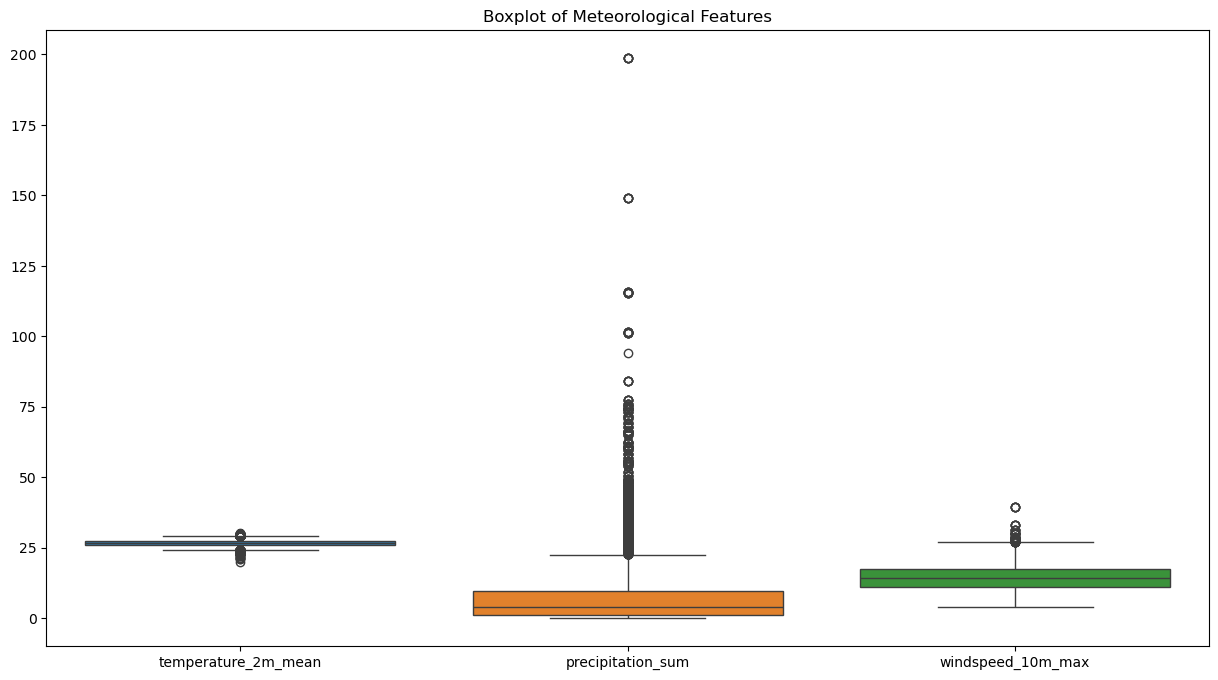

In [94]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['temperature_2m_mean', 'precipitation_sum', 'windspeed_10m_max']])
plt.title('Boxplot of Meteorological Features')
plt.show()


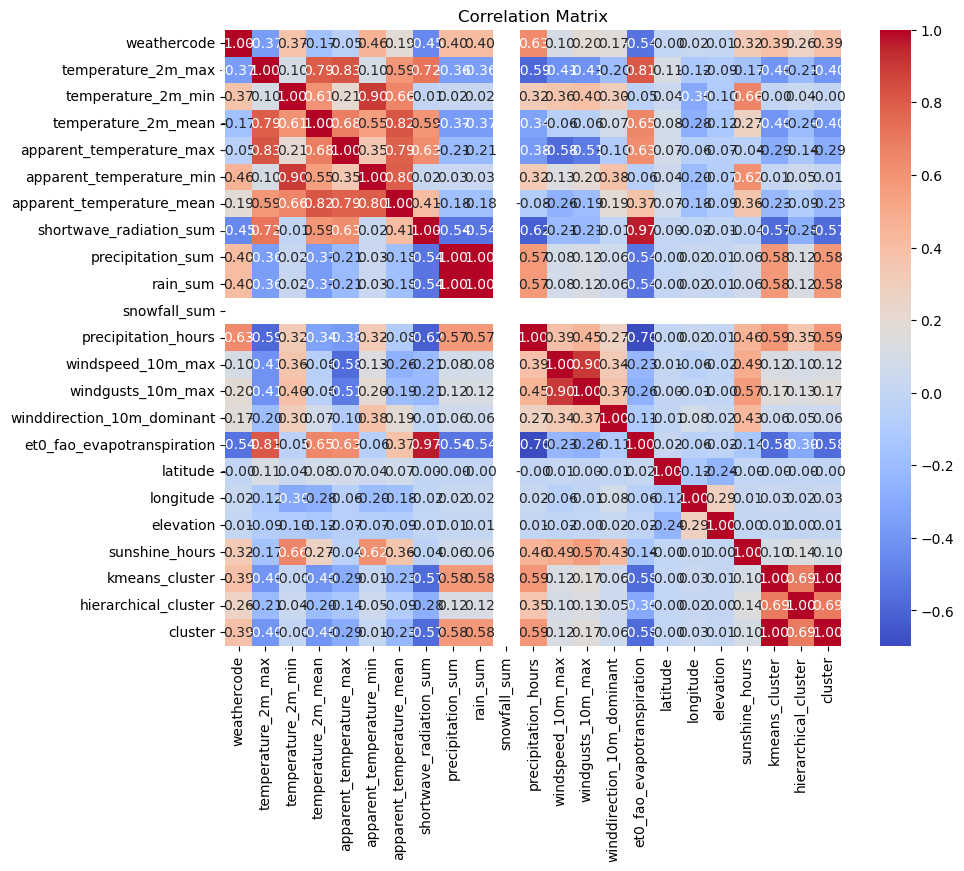

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



In [91]:
# Improved Linear Regression with Polynomial Features and Regularization
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define pipeline for Polynomial Regression with Ridge Regularization
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)
linear_model = make_pipeline(scaler, poly, Ridge())

# Cross-validation to check performance
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared for Improved Linear Regression: {cv_scores.mean():.4f}")

# Train the model on the full training set
linear_model.fit(X_train, y_train)

# Make predictions and evaluate on test set
lr_predictions = linear_model.predict(X_test)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Display improved Linear Regression results
print(f"Improved Linear Regression - MAE: {lr_mae:.4f}")
print(f"Improved Linear Regression - MSE: {lr_mse:.4f}")
print(f"Improved Linear Regression - R-squared: {lr_r2:.4f}")

Cross-validated R-squared for Improved Linear Regression: 0.6497
Improved Linear Regression - MAE: 0.1308
Improved Linear Regression - MSE: 0.0271
Improved Linear Regression - R-squared: 0.6403


In [59]:
# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Make predictions using SVR
svr_predictions = svr_model.predict(X_test_scaled)

# Evaluate the SVR model
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Display results for SVR
print(f"SVR - MAE: {svr_mae:.4f}")
print(f"SVR - MSE: {svr_mse:.4f}")
print(f"SVR - R-squared: {svr_r2:.4f}")


SVR - MAE: 0.1080
SVR - MSE: 0.0209
SVR - R-squared: 0.7232


In [60]:
# Hyperparameter tuning for SVR using GridSearchCV
param_grid = {'C': [1, 10, 100], 'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2, 0.5]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found through grid search
print("Best parameters found for SVR: ", grid_search.best_params_)


Best parameters found for SVR:  {'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}


In [61]:
 #Import SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test_scaled)

# Evaluate SVR model
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Display results
print(f"SVR - MAE: {svr_mae}, MSE: {svr_mse}, R-squared: {svr_r2}")



SVR - MAE: 0.10799004167196921, MSE: 0.020869656472181003, R-squared: 0.7231632373273411


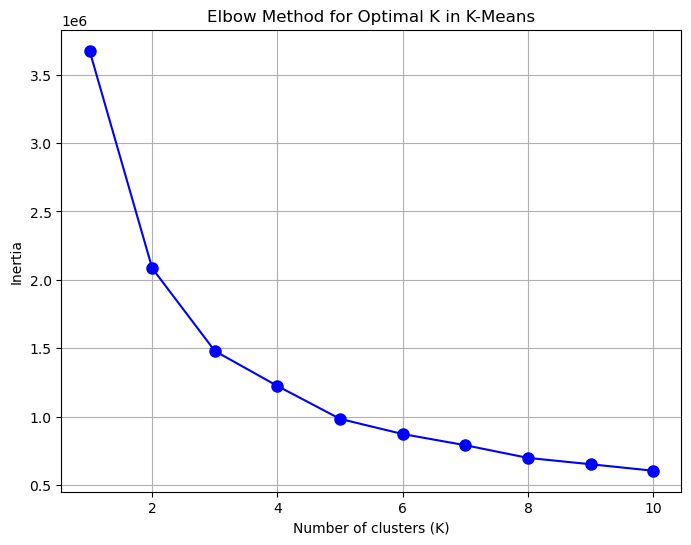

Silhouette Score for K-Means: 0.4368


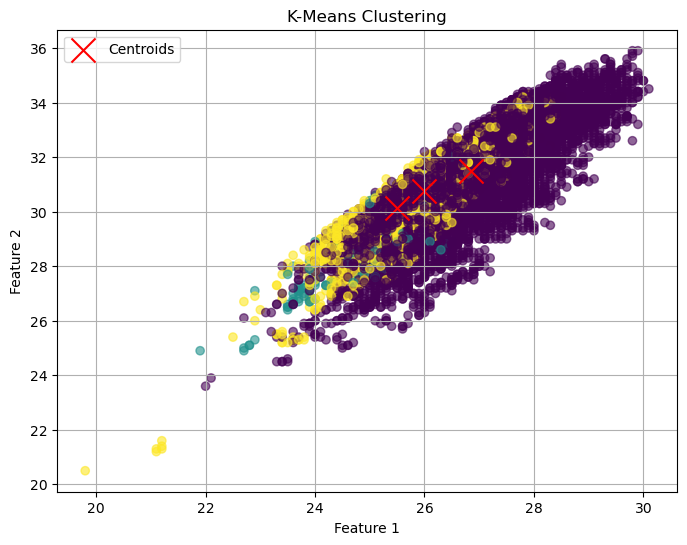

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, 11)  # Test for K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal K in K-Means')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose optimal number of clusters based on elbow method or silhouette score
n_clusters = 3  # Adjust based on elbow method results

# Initialize KMeans with chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans on the feature set and assign labels
kmeans_labels = kmeans.fit_predict(X)

# Assign clusters to the original data
data['kmeans_cluster'] = np.nan  # Initialize the cluster column with NaNs
data.loc[y.index, 'kmeans_cluster'] = kmeans_labels  # Assign cluster labels

# Calculate silhouette score for K-Means clustering
silhouette_avg = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg:.4f}')

# Check if the shape of X is appropriate for plotting
if X.shape[1] >= 2:
    # Visualize K-Means clusters (if X has 2 or more features)
    plt.figure(figsize=(8, 6))

    # Convert X to a NumPy array if it's a DataFrame
    X_array = X.values if hasattr(X, 'values') else X

    plt.scatter(X_array[:, 0], X_array[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The feature set X must have at least two features for 2D plotting.")






Length of original data: 25263
Length of feature data X: 25263


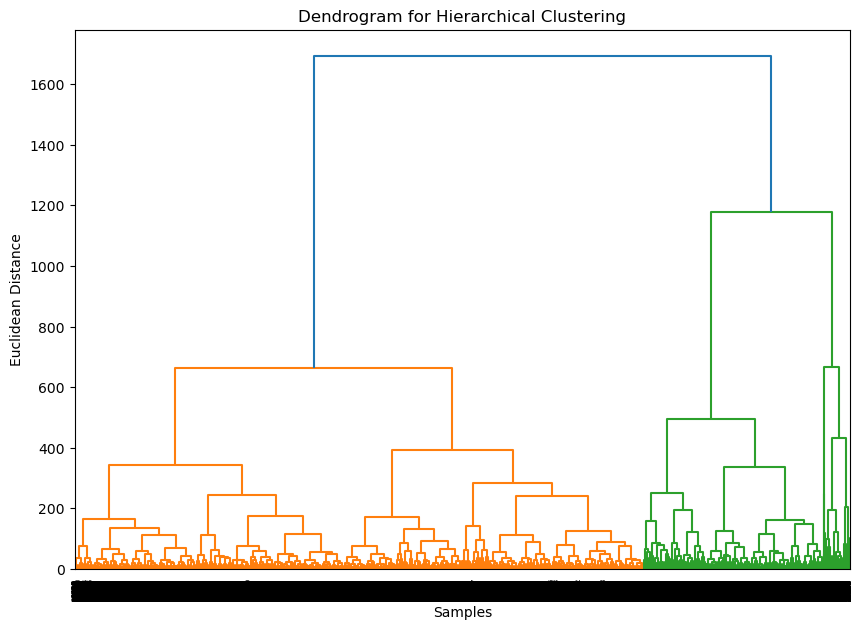

In [63]:
# Import necessary libraries for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Ensure n_clusters is defined
n_clusters = 3  # Adjust this if needed

# Display lengths to check for consistency
print(f"Length of original data: {len(data)}")
print(f"Length of feature data X: {len(X)}")

# Initialize Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)

# Fit and predict cluster assignments
data['hierarchical_cluster'] = np.nan  # Initialize column with NaN values
data.loc[X.index, 'hierarchical_cluster'] = hierarchical.fit_predict(X)

# Create a dendrogram
plt.figure(figsize=(10, 7))
# Create the linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Create the dendrogram
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


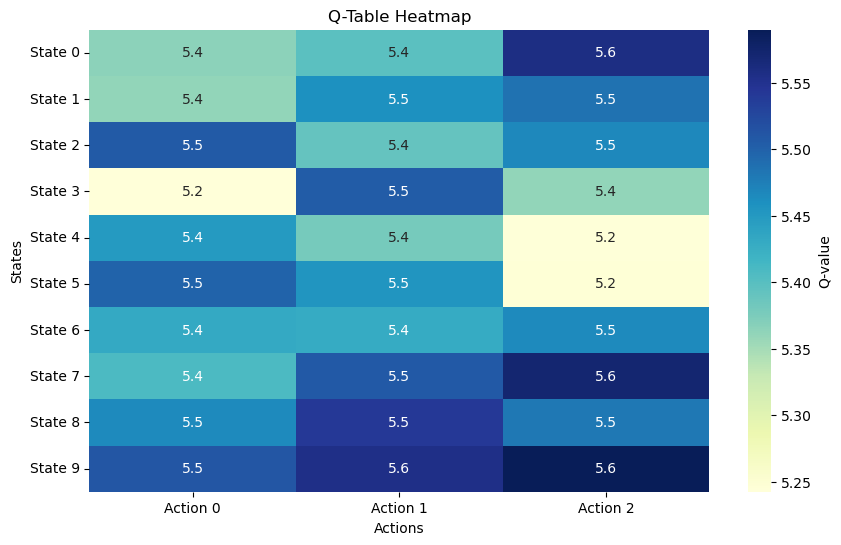

In [100]:
# Dummy setup for reinforcement learning

import numpy as np

# Q-Learning parameters
learning_rate = 0.1
discount_factor = 0.9
num_episodes = 1000

# Example state and action space
state_space_size = 10  # Example states
action_space_size = 3   # Example actions

# Initialize Q-table
Q_table = np.zeros((state_space_size, action_space_size))

# Example of Q-Learning process
for episode in range(num_episodes):
    state = np.random.randint(0, state_space_size)
    for _ in range(100):  # Limit number of actions per episode
        action = np.random.randint(0, action_space_size)  # Choose action randomly
        reward = np.random.rand()  # Dummy reward
        next_state = (state + 1) % state_space_size  # Example state transition

        # Update Q-value
        Q_table[state, action] = (1 - learning_rate) * Q_table[state, action] + \
                                  learning_rate * (reward + discount_factor * np.max(Q_table[next_state]))

        state = next_state  # Transition to the next state

# Parameters (assuming they are the same as in your setup)
state_space_size = 10
action_space_size = 3

# Plot the Q-table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Q_table, annot=True, cmap="YlGnBu", xticklabels=[f'Action {i}' for i in range(action_space_size)],
            yticklabels=[f'State {i}' for i in range(state_space_size)], cbar_kws={'label': 'Q-value'})
plt.title('Q-Table Heatmap')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()

In [65]:
# Summary of model performances
print("Performance Summary:")
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R-squared: {lr_r2}")
print(f"SVR - MAE: {svr_mae}, MSE: {svr_mse}, R-squared: {svr_r2}")

# Recommendations based on model performance
if lr_r2 > svr_r2:
    print("Linear Regression outperformed SVR. Consider using Linear Regression for predictions.")
else:
    print("SVR outperformed Linear Regression. Consider using SVR for predictions.")

Performance Summary:
Linear Regression - MAE: 0.13075797636646205, MSE: 0.027118595610175458, R-squared: 0.6402708292320356
SVR - MAE: 0.10799004167196921, MSE: 0.020869656472181003, R-squared: 0.7231632373273411
SVR outperformed Linear Regression. Consider using SVR for predictions.


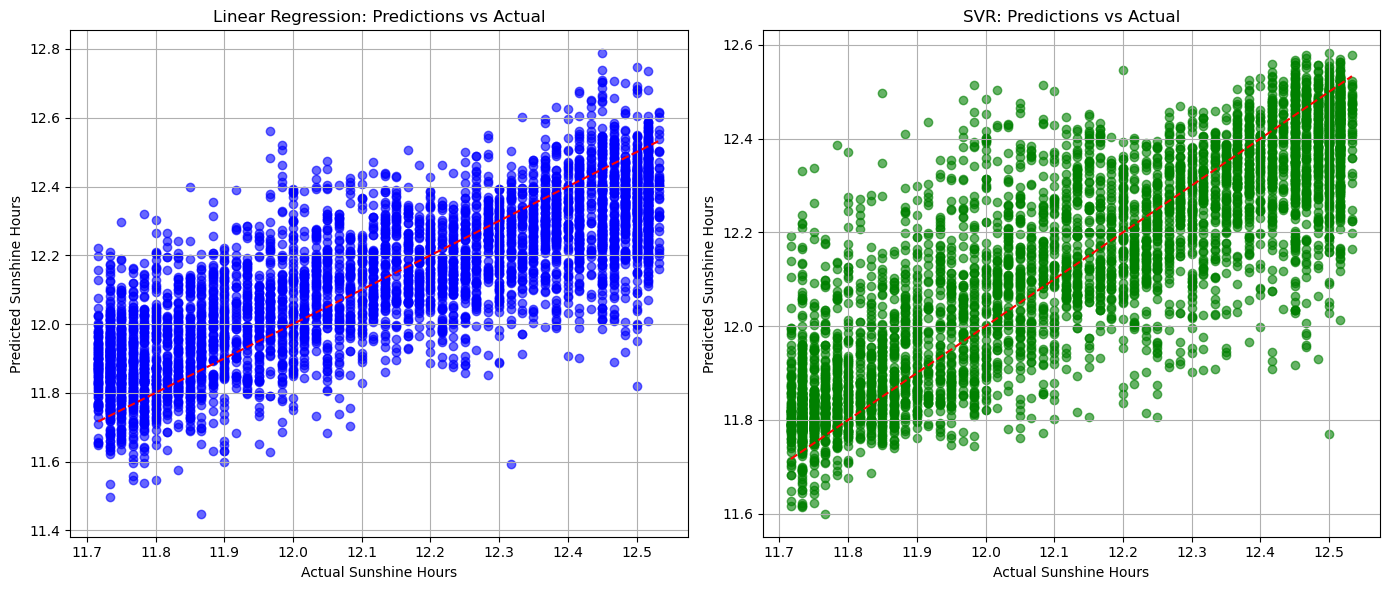

In [66]:
# Visualize predictions vs actual values for Linear Regression
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Sunshine Hours')
plt.ylabel('Predicted Sunshine Hours')
plt.grid(True)

# SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, svr_predictions, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('SVR: Predictions vs Actual')
plt.xlabel('Actual Sunshine Hours')
plt.ylabel('Predicted Sunshine Hours')
plt.grid(True)

plt.tight_layout()
plt.show()

In [67]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Check the shape of the data used for clustering
print(f"Shape of original data: {data.shape}")
print(f"Shape of features X: {X.shape}")

# Choose number of clusters
n_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans on the feature set
kmeans_labels = kmeans.fit_predict(X)  # Get the cluster labels

# Check if the length of kmeans_labels matches the filtered data
if len(kmeans_labels) == len(data.loc[y.index]):  # Ensure to compare with the right length
    data['cluster'] = np.nan  # Initialize the cluster column with NaNs
    data.loc[y.index, 'cluster'] = kmeans_labels  # Assign cluster labels based on the index of y
else:
    print("Error: Length mismatch between kmeans_labels and data subset.")

# Display the first few rows with cluster labels
print(data[['temperature_2m_mean', 'precipitation_sum', 'cluster']].head())

Shape of original data: (25263, 27)
Shape of features X: (25263, 6)
   temperature_2m_mean  precipitation_sum  cluster
0                 26.1                0.0      0.0
1                 26.2                0.1      0.0
2                 26.0                0.6      0.0
3                 25.3                0.0      0.0
4                 24.5                0.0      0.0


In [69]:

import pandas as pd
import folium

#  Save the modified dataset with predictions and clusters
data.to_csv(r'D:\ML2\SriLanka_Weather_Results_new.csv', index=False)
print("Results saved successfully!")

#  Map visualization for solar potential across Sri Lanka
if 'latitude' in data.columns and 'longitude' in data.columns:
    # Aggregate data by latitude and longitude
    location_data = data[['latitude', 'longitude', 'sunshine_hours', 'temperature_2m_mean']].copy()
    location_data = location_data.groupby(['latitude', 'longitude']).mean().reset_index()

    # Generate the map centered on Sri Lanka
    sri_lanka_map = folium.Map(location=[7.8731, 80.7718], zoom_start=8)

    # Add each point as a marker on the map
    for _, row in location_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=7,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.6,
            popup=(f"Mean Sunshine Hours: {row['sunshine_hours']:.2f}<br>"
                   f"Avg Temperature: {row['temperature_2m_mean']:.2f}°C")
        ).add_to(sri_lanka_map)

    #  Save the map to a local file
    map_file_path = r'D:\ML2\Sri_Lanka_Solar_Potential_Map.html'
    sri_lanka_map.save(map_file_path)
    print(f"Map with solar potential saved successfully at {map_file_path}!")
else:
    print("Latitude and longitude data are missing from the dataset.")


Results saved successfully!
Map with solar potential saved successfully at D:\ML2\Sri_Lanka_Solar_Potential_Map.html!


In [70]:
# Summary of Findings
print("Summary of Findings:")
print("1. The Linear Regression model has been evaluated with MAE, MSE, and R-squared metrics.")
print("2. The Support Vector Regression (SVR) model has been evaluated with similar metrics.")
print("3. Clustering analysis using K-Means and Hierarchical methods was performed.")
print("4. Visualizations were provided to compare model predictions against actual values.")
print("5. Recommendations for solar energy optimization in Sri Lanka were made based on model performance.")

Summary of Findings:
1. The Linear Regression model has been evaluated with MAE, MSE, and R-squared metrics.
2. The Support Vector Regression (SVR) model has been evaluated with similar metrics.
3. Clustering analysis using K-Means and Hierarchical methods was performed.
4. Visualizations were provided to compare model predictions against actual values.
5. Recommendations for solar energy optimization in Sri Lanka were made based on model performance.
